In [1]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_contents = sio.loadmat("data.mat")

The first 15 subjects are from Taylor et al 2014, the next 10 are the rotating condition from Bond et al 2015, next 10 are from fixed landmarks from bond et al 2015, next ten are Brudner et al 2016, and last ten are unpublished.

In [2]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Mon Nov 27 20:46:03 2017',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                ...,
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0],
                [0, 0, 0, ..., 0, 0, 0]], dtype=int16), array([[ 6.09821195, -2.85402497,  1.48145717, ..., -0.49821161,
                  1.23387217, -0.17849095],
                [ 1.88067824, -1.04162668,  1.03535319, ...,  7.52382044,
                 14.33280283,  1.94148639],
                [-0.51928288,  0.3472429 ,  0.6902772 , ..., -5.49232456,
                  2.45753815,  7.28595913],
                ...,
                [-2.5791475 ,  0.51616423, -3.97938245, ..., 14.71756657,
                 14.72548276, 21.42958369],
                [ 0.3430844 ,  2.08256528,  3.78056853, ..., 13.28018469,
             

In [3]:
rot = mat_contents["data"]["rotation"][0][0]
target_error = mat_contents["data"]["target_error"][0][0]
hand_angle = mat_contents["data"]["hand_angle"][0][0]
explicit = mat_contents["data"]["explicit"][0][0]
implicit = mat_contents["data"]["implicit"][0][0]
rt = mat_contents["data"]["rt"][0][0]
mt = mat_contents["data"]["rt"][0][0]

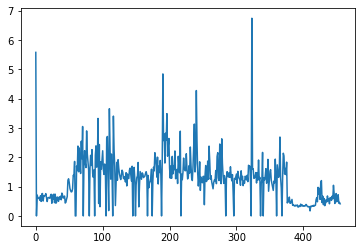

In [63]:
plt.plot(rt[0])

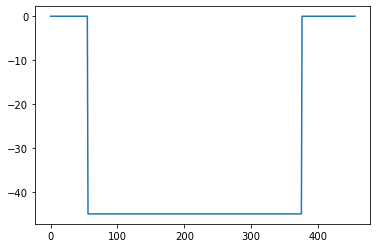

In [23]:
plt.plot(rot[1])

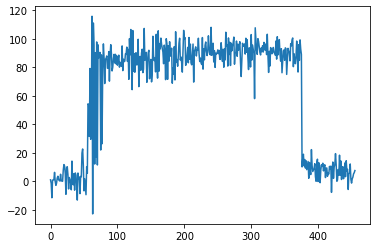

In [104]:
plt.plot(target_error[6])

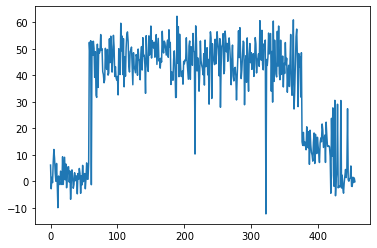

In [85]:
plt.plot(hand_angle[0])

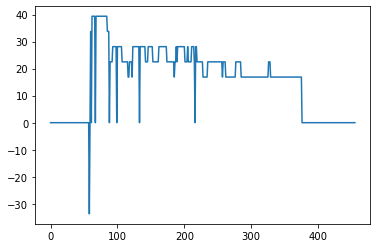

In [87]:
plt.plot(explicit[13])

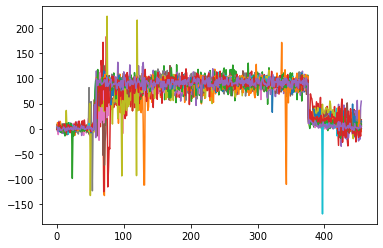

In [125]:
for i in range(15):
    plt.plot(target_error[i])

(-60.0, 45.0)

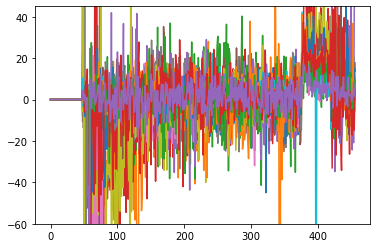

In [129]:
for i in range(15):
    plt.plot(np.nan_to_num(implicit[i])+np.nan_to_num(explicit[i])+rot[i])

plt.ylim(-60, 45)

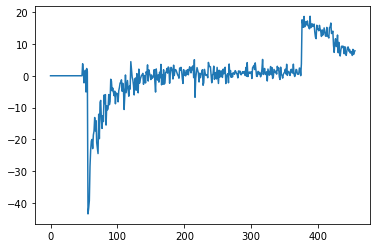

In [4]:
plt.plot(np.mean(np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot, axis = 0))

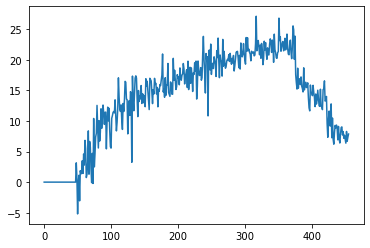

In [133]:
plt.plot(np.mean(np.nan_to_num(implicit), axis = 0))

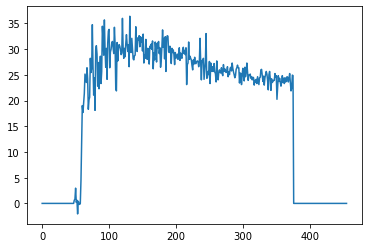

In [134]:
plt.plot(np.mean(np.nan_to_num(explicit), axis = 0))

In [73]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot

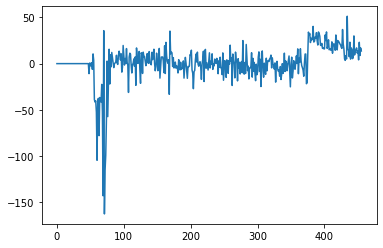

In [68]:
plt.plot(error[5])

In [152]:
error = np.nan_to_num(implicit)+np.nan_to_num(explicit)+rot
target = np.nan_to_num(explicit[:,56:-80]) / np.max(np.nan_to_num(explicit))
error = error[:,56:] / 45 
target = np.roll(target, -1, axis = 1)
target = target[:,:-80]

In [164]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import regularizers
from tensorflow.keras import initializers

hidden = 10
target = np.reshape(target, (target.shape[0], target.shape[1], 1))
error = np.reshape(error, (error.shape[0], error.shape[1], 1))
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(hidden, 
    use_bias=False, 
    kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2),
    kernel_initializer=initializers.RandomNormal(stddev=0.01)))
model.add(Dense(target.shape[1], use_bias=False, kernel_regularizer=regularizers.L1L2(l1=1e-3, l2=1e-2)))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(error, target, epochs=200, batch_size=55, verbose=2, shuffle = True)

Epoch 1/200
1/1 - 1s - loss: 0.4178 - 1s/epoch - 1s/step
Epoch 2/200
1/1 - 0s - loss: 0.4117 - 85ms/epoch - 85ms/step
Epoch 3/200
1/1 - 0s - loss: 0.4056 - 86ms/epoch - 86ms/step
Epoch 4/200
1/1 - 0s - loss: 0.3996 - 88ms/epoch - 88ms/step
Epoch 5/200
1/1 - 0s - loss: 0.3937 - 88ms/epoch - 88ms/step
Epoch 6/200
1/1 - 0s - loss: 0.3878 - 88ms/epoch - 88ms/step
Epoch 7/200
1/1 - 0s - loss: 0.3820 - 82ms/epoch - 82ms/step
Epoch 8/200
1/1 - 0s - loss: 0.3763 - 85ms/epoch - 85ms/step
Epoch 9/200
1/1 - 0s - loss: 0.3706 - 79ms/epoch - 79ms/step
Epoch 10/200
1/1 - 0s - loss: 0.3650 - 82ms/epoch - 82ms/step
Epoch 11/200
1/1 - 0s - loss: 0.3595 - 78ms/epoch - 78ms/step
Epoch 12/200
1/1 - 0s - loss: 0.3541 - 87ms/epoch - 87ms/step
Epoch 13/200
1/1 - 0s - loss: 0.3487 - 81ms/epoch - 81ms/step
Epoch 14/200
1/1 - 0s - loss: 0.3434 - 77ms/epoch - 77ms/step
Epoch 15/200
1/1 - 0s - loss: 0.3382 - 82ms/epoch - 82ms/step
Epoch 16/200
1/1 - 0s - loss: 0.3330 - 83ms/epoch - 83ms/step
Epoch 17/200
1/1 - 0s

Epoch 133/200
1/1 - 0s - loss: 0.0573 - 84ms/epoch - 84ms/step
Epoch 134/200
1/1 - 0s - loss: 0.0566 - 84ms/epoch - 84ms/step
Epoch 135/200
1/1 - 0s - loss: 0.0560 - 82ms/epoch - 82ms/step
Epoch 136/200
1/1 - 0s - loss: 0.0553 - 80ms/epoch - 80ms/step
Epoch 137/200
1/1 - 0s - loss: 0.0547 - 80ms/epoch - 80ms/step
Epoch 138/200
1/1 - 0s - loss: 0.0541 - 79ms/epoch - 79ms/step
Epoch 139/200
1/1 - 0s - loss: 0.0536 - 81ms/epoch - 81ms/step
Epoch 140/200
1/1 - 0s - loss: 0.0530 - 81ms/epoch - 81ms/step
Epoch 141/200
1/1 - 0s - loss: 0.0524 - 82ms/epoch - 82ms/step
Epoch 142/200
1/1 - 0s - loss: 0.0519 - 82ms/epoch - 82ms/step
Epoch 143/200
1/1 - 0s - loss: 0.0514 - 85ms/epoch - 85ms/step
Epoch 144/200
1/1 - 0s - loss: 0.0508 - 85ms/epoch - 85ms/step
Epoch 145/200
1/1 - 0s - loss: 0.0503 - 85ms/epoch - 85ms/step
Epoch 146/200
1/1 - 0s - loss: 0.0498 - 88ms/epoch - 88ms/step
Epoch 147/200
1/1 - 0s - loss: 0.0494 - 84ms/epoch - 84ms/step
Epoch 148/200
1/1 - 0s - loss: 0.0489 - 82ms/epoch - 82

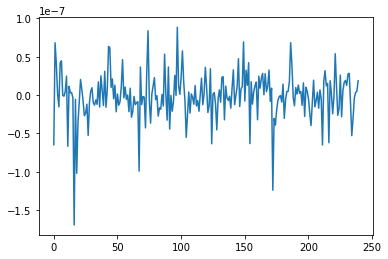

In [165]:
predict = model.predict(np.reshape(error[15], (1, 400, 1)))
plt.plot(predict[0])

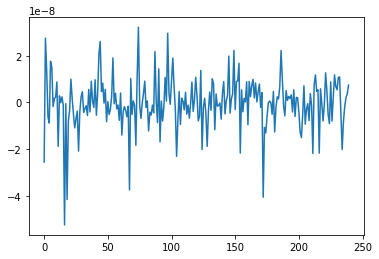

In [166]:
predict = model.predict(np.reshape(error[34], (1, 400, 1)))
plt.plot(predict[0])

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

model = nn.RNN(10, 20, 2)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
## Choose the appropriate loss function
loss_fn = torch.nn.MSELoss()
## Cache for Loss Values
losses = []
## Training Loop
for epoch in range(100):
    total_loss = .0
    model.train()
    for batch, (context, target) in enumerate(get_cbow_batches(train_data, batch_size)):
        if gpu_avail:
            context = context.cuda()
            target = target.cuda()
        predict = model(context)
        loss = loss_fn(predict, torch.flatten(target))
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if print_every is not None and (batch + 1) % print_every == 0:
            print("Epoch {} || batch {} || Loss: {:.4f}".format(epoch+1, batch+1, total_loss / (batch+1)))

    model.eval()
    ## Compute Loss on Test and Training Data
    train_loss = total_loss / (batch+1) 
    test_loss = .0
    for batch, (context, target) in enumerate(get_cbow_batches(test_data, batch_size)):
        if gpu_avail:
            context = context.cuda()
            target = target.cuda()
        predict = model(context)

        loss = loss_fn(predict, torch.flatten(target))
        test_loss += loss.item()
    test_loss = test_loss / (batch+1)
    print("Epoch {}/{} || Train Loss: {:.4f} || Test Loss: {:.4f}".format(epoch+1, n_epoch, train_loss, test_loss))
    losses.append(train_loss)
    test_losses.append(test_loss)
print("Training Complete.")
return model, losses, test_losses

In [36]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat = sio.loadmat("OnlineNoReportData.mat")

In [2]:
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed May 29 10:48:40 2013',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[[  12.66648698,   12.68140602,   12.69797301, ...,
                            nan,           nan,           nan],
                 [  25.53014398,   25.54754901,   25.5647881 , ...,
                            nan,           nan,           nan],
                 [  33.76314116,   33.78072596,   33.79659605, ...,
                            nan,           nan,           nan],
                 ...,
                 [1155.83608484, 1155.85328984, 1155.86920381, ...,
                            nan,           nan,           nan],
                 [1160.55282187, 1160.56951785, 1160.58592296, ...,
                            nan,           nan,           nan],
                 [1165.3871839 , 1165.40206385, 1165.41967583, ...,
                            nan,           nan,           nan]],
 
                [[  24.1583848 ,   2

In [136]:
x = mat["data"]["cursor_x"][0][0]
y = mat["data"]["cursor_y"][0][0]
target_dist = mat["data"]["target_dist"][0][0]
target_angle = mat["data"]["target_angle"][0][0]
hand_angle = mat["data"]["hand_angle"][0][0]
rotation = mat["data"]["rotation"][0][0]
hand_r = mat["data"]["hand_r"][0][0]
hand_x = mat["data"]["hand_x"][0][0]
hand_y = mat["data"]["hand_y"][0][0]
target_x = mat["data"]["target_x"][0][0]
target_y = mat["data"]["target_y"][0][0]

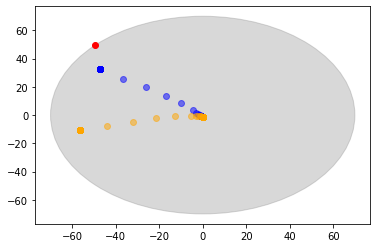

In [152]:
circle1 = plt.Circle((0, 0),70, color='gray', alpha = 0.3)
plt.gca().add_patch(circle1)
plt.scatter(x[1,60,:],y[1,60,:],color="blue",alpha = 0.5)
plt.scatter(hand_x[1,60,:],hand_y[1,60,:],color = "orange",alpha = 0.5)
plt.scatter(target_x[1,60],target_y[1,60],color = "red",alpha = 1)

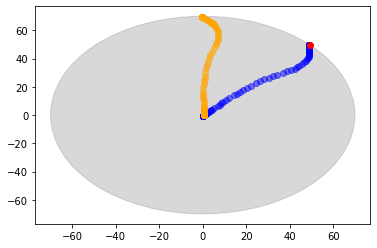

In [150]:
circle1 = plt.Circle((0, 0),70, color='gray', alpha = 0.3)
plt.gca().add_patch(circle1)
plt.scatter(x[1,90,:],y[1,90,:],color="blue",alpha = 0.5)
plt.scatter(hand_x[1,90,:],hand_y[1,90,:],color = "orange",alpha = 0.5)
plt.scatter(target_x[1,90],target_y[1,90],color = "red",alpha = 1)

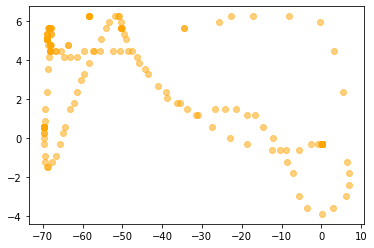

In [146]:
plt.scatter(hand_x[1,100,:],hand_y[1,100,:],color = "orange",alpha = 0.5)

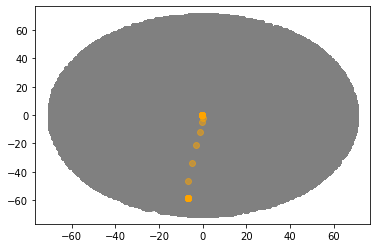

In [50]:
plt.scatter(x[:,:,:],y[:,:,:],color="gray",alpha = 0.5)
plt.scatter(hand_x[1,1,:],hand_y[1,1,:],color = "orange",alpha = 0.5)

In [48]:
hand_x[1,1]

array([-0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
       -0.297657, -0.297657, -0.297657, -0.297657, -0.297657, -0.297657,
        0.      , -0.297657, -1.190628, -2.97657 , -5.060169, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, -6.548454, -6.548454,
       -6.548454, -6.548454, -6.548454, -6.548454, 

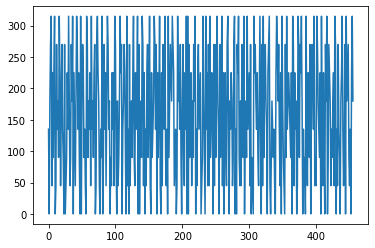

In [39]:
plt.plot(target_angle[0])

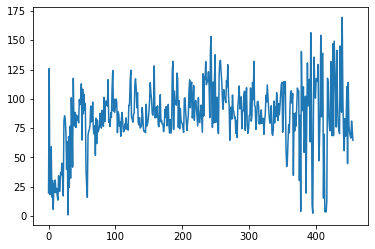

In [44]:
plt.plot(hand_r[0])

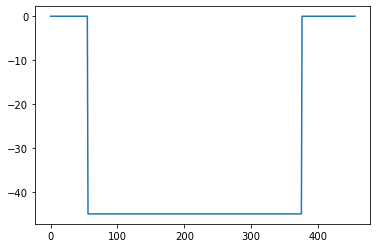

In [42]:
plt.plot(rotation[0])

In [53]:
hand_angle.shape

(15, 456)